In [42]:
import matplotlib
matplotlib.use('Agg')
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

/Users/ani/anaconda/lib/python3.4/site-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


###Discussion Question

In 2014, the Pew Research Foundation surveyed U.S. adults about their smartphone use. Here is their summary of survey data on smartphone use for purposes other than texting, email, or making calls. 

![smartphone bargraph](smartphone_bargraph.png)

The total number of people who completed the survey was 1,035. For each of the questions below, say whether it can be answered based on the information given. If it's not possible, explain why not.

Among those who completed the survey, how many people used their cell phone to 

(a) submit a job application?

(a) submit a job application or get info about a health condition?

### Distributions of Ethnicity across the United States  in 2014
The Kaiser Family Foundation has complied Census data on the distribution of ethnicities in the United States. Here are some of the data, arranged by state. The table ``children`` contains data for people were younger than 18 years old in 2014; ``everyone`` contains the data for people of all ages.

In [2]:
from datascience import *
children = Table.read_table('children.csv')
adults = Table.read_table('adults.csv')
adults

OSError: File b'children.csv' does not exist

In [48]:
# children: under 18 years old

children = Table.read_table('children.csv')
children = children.drop('Total')

# everyone, including children
all_data = Table.read_table('adults.csv')
all_data['American Indian/Alaska Native'] = [i if i==i else 0 for i in all_data['American Indian/Alaska Native']]
all_data['Asian'] = [i if i==i else 0 for i in all_data['Asian']]
all_data['Other'] = all_data['Asian']+all_data['American Indian/Alaska Native']+all_data['Two Or More Races']
everyone = all_data.select(['Location','White','Black','Hispanic','Other'])

In [49]:
children

Location,White,Black,Hispanic,Other
United States,0.52,0.14,0.24,0.1
Alabama,0.6,0.31,0.06,0.03
Alaska,0.46,0.03,0.12,0.39
Arizona,0.33,0.03,0.54,0.09
Arkansas,0.63,0.18,0.1,0.08
California,0.29,0.05,0.5,0.16
Colorado,0.55,0.05,0.31,0.09
Connecticut,0.62,0.08,0.21,0.09
Delaware,0.52,0.22,0.17,0.08
District of Columbia,0.25,0.56,0.15,0.05


In [78]:
everyone

Location,White,Black,Hispanic,Other
United States,0.62,0.12,0.18,0.09
Alabama,0.66,0.27,0.04,0.03
Alaska,0.57,0.02,0.09,0.33
Arizona,0.49,0.04,0.39,0.08
Arkansas,0.72,0.16,0.07,0.03
California,0.39,0.05,0.38,0.18
Colorado,0.7,0.04,0.21,0.04
Connecticut,0.71,0.09,0.13,0.07
Delaware,0.63,0.2,0.1,0.06
District of Columbia,0.37,0.47,0.11,0.06


#### A demographic shift in California 
Visualizing these data can help us spot changes in the racial compositions of the states. Let us start by extracting the rows corresponding to California in the tables ``everyone`` and ``children``.

In [ ]:
all_rowCA = everyone.where('Location','California').rows[0][1:5]
child_rowCA = children.where('Location','California').rows[0][1:5]

We can now place these rows into a table ``california`` whose first *column* contains the ethnicities. The second and third columns of ``california`` contain the proportions of each ethnicity among all Californians and among Californian children.

In [51]:
california = Table([['White','Black','Hispanic','Other'],
                    all_rowCA,child_rowCA],
                   ['Ethnicity','All','Children'])

In [52]:
california

Ethnicity,All,Children
White,0.39,0.29
Black,0.05,0.05
Hispanic,0.38,0.5
Other,0.18,0.16


Bar graphs help us visualize the distributions. Calling ``barh`` on the table ``california``, with ``Ethnicity`` as the column of labels, gives us two bar graphs, one for all Californians and one for children.

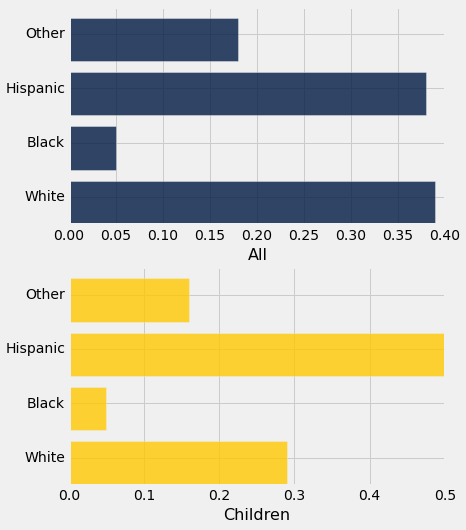

In [53]:
california.barh('Ethnicity')

But these graphs are difficult to compare, as the scales are different and the corresponding bars in the two bar graphs are widely separated. The ``overlay=True`` option makes comparisons easier.

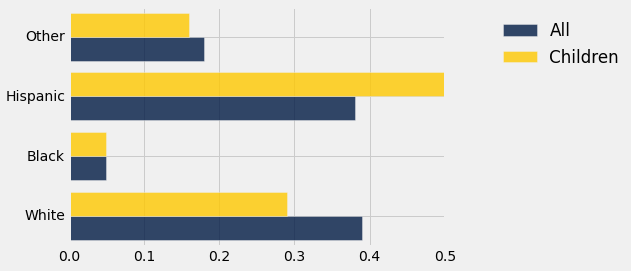

In [7]:
california.barh('Category', overlay=True)

It is now easy to see the increase in the proportion of Hispanics in California. In 2014, fewer than 40% of Californians were Hispanic. But 50% of the children were, which is the crucial ingredient in predictions that Hispanics will be a majority in California in a few years.

What about other states? For each one, we can do what we did for California, but this time we will define a function ``state_bargraph`` that takes the name of a state as its argument and does all the work for us.

In [59]:
def state_bargraph(name):
    adult_row = everyone.where('Location',name).rows[0][1:5]
    child_row = children.where('Location',name).rows[0][1:5]
    t = Table([['White','Black','Hispanic','Other'],adult_row,child_row],['Ethnicity','All','Children'])
    t.barh('Ethnicity', overlay=True)

In numerous states you can see that the proportion of Hispanic children is higher the the overall proportion of Hispanics, signalling a likely increase in the proportion of Hispanics in the future. Vermont is an exception. See if you can find some others.

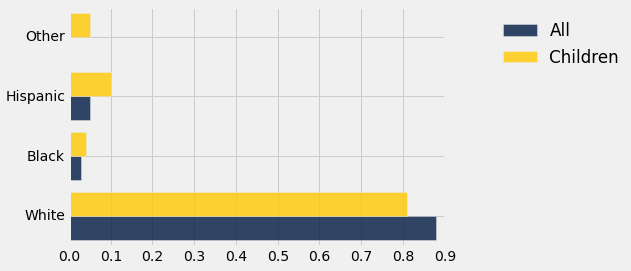

In [77]:
state_bargraph('Iowa')